<a href="https://colab.research.google.com/github/stratoskar/Path_Based_Traffic_Flow_Prediction/blob/main/Python_Code/1_Data_Collection_and_Trajectory_Splitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collection**

The data used for this research comes from a project called the cabspotting project. Specifically, this dataset contains around 11.000.000 GPS data of various taxis (Yellow Cab Vehicles) in the San Francisco, California area. The whole data sampling occurred withing May
and June in 2008.

*   You can have access to the data [here](https://github.com/stratoskar/Path-Based-Traffic-Flow-Prediction/tree/main/Dataset)

*   You can read more about the dataset [here](https://stamen.com/work/cabspotting/)





In [1]:
# Library to load data files
import os

# Data analysis libraries
import numpy as np
import pandas as pd

# Handle timestamps
from datetime import datetime, timedelta

In [4]:
# Access Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the folder with the data
PATH = '/content/drive/MyDrive/Paper/Datasets/Traffic Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Our dataset is a zip file that contains many files. Each one of the files contains the trajectory of one Yellow Taxi. For each taxi, the trajectory data are withing 17-05-2008 and 10-06-2008. All the taxis are moving inside the San Francisco city.

*To use the dataset, first unzip the file and run the code below.*

In [5]:
# When iterating though the folder with the trajectory files, we read one file per time and add it in a single daraframe
# In order to keep track of the current trajectory, we assing a unique 'taxi_id' in the current trajectory data.
# Counter represents the current trajectory, so counter equals to 'taxi_id'.
counter = 0

# Create an empty dataframe, in which all the data will be saved
all_data = pd.DataFrame(columns=['taxi_id','Latitude','Longitude','Occupied','Date Time'])

for filename in os.listdir(PATH):

    try:
      # Read each file in the Data folder
      temp = pd.read_csv(PATH+'/'+filename,names=['Latitude','Longitude','Occupied','Date Time'],sep=' ')

      # Assign 'taxi_id' number to each file
      temp.insert(1,'taxi_id',counter)

      # Add the data in this file in the 'all_data' dataframe
      all_data = pd.concat([all_data, temp],ignore_index = True)

      # Increase 'taxi_id' number by 1
      counter += 1

      # Print file number ('taxi_id')
      print(f'File number is: {counter}')

    except: # If you meet any problem, move on
      continue

File number is: 1
File number is: 2
File number is: 3
File number is: 4
File number is: 5
File number is: 6
File number is: 7
File number is: 8
File number is: 9
File number is: 10
File number is: 11
File number is: 12
File number is: 13
File number is: 14
File number is: 15
File number is: 16
File number is: 17
File number is: 18
File number is: 19
File number is: 20
File number is: 21
File number is: 22
File number is: 23
File number is: 24
File number is: 25
File number is: 26
File number is: 27
File number is: 28
File number is: 29
File number is: 30
File number is: 31
File number is: 32
File number is: 33
File number is: 34
File number is: 35
File number is: 36
File number is: 37
File number is: 38
File number is: 39
File number is: 40
File number is: 41
File number is: 42
File number is: 43
File number is: 44
File number is: 45
File number is: 46
File number is: 47
File number is: 48
File number is: 49
File number is: 50
File number is: 51
File number is: 52
File number is: 53
Fi

In [6]:
# Cast 'Date Time' column to timestamp
all_data['Date Time'] = pd.to_datetime(all_data['Date Time'],origin='unix',unit='s')

In [7]:
# Sort all the data based in 'taxi_id' and 'Date Time' columns
all_data = all_data.sort_values(['taxi_id','Date Time'])

# Reset index, start indexing from zero
all_data = all_data.reset_index(drop=True)

**Delete the 'Occupied' column**
This column denotes whether or not the taxi was occupied by a passenger during GPS recording. So, this information is not useful for our research.

In [8]:
# Drop column
all_data.drop('Occupied',axis=1,inplace=True)

**Present information about the dataset**

In [9]:
# Show the shape of whole dataset
all_data.shape

(11220491, 4)

In [10]:
# Select only data from 17th of May 2008 till 30th of May 2008 inclusive
all_data = all_data[(all_data['Date Time'] >= "2008-05-01 00:00:00") & (all_data['Date Time'] <= "2008-05-30 00:00:00")]

In [11]:
# Show the shape of data we use in this research
all_data.shape

(5932540, 4)

In [12]:
# Print data types of every column present in the dataframe
all_data.dtypes

taxi_id              object
Latitude             object
Longitude            object
Date Time    datetime64[ns]
dtype: object

In [13]:
# Show schema information of the dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5932540 entries, 0 to 11209686
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   taxi_id    object        
 1   Latitude   object        
 2   Longitude  object        
 3   Date Time  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 226.3+ MB


In [ ]:
# Present statistical insights about this dataframe
all_data.describe()

<ipython-input-10-f1923e998ded>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_data.describe()


,taxi_id,Latitude,Longitude,Date Time
count,11220491.0,1.122049e+07,1.122049e+07,11219955
unique,537.0,5.995300e+04,5.192000e+04,2023603
top,369.0,3.775136e+01,-1.223861e+02,2008-05-24 07:03:55
freq,49367.0,1.126000e+04,7.592000e+03,414
first,NaN,NaN,NaN,2008-05-17 10:00:04
last,NaN,NaN,NaN,2008-06-10 09:25:34


**Split the trajectories based on time field and FIle ID**

In the image below, a road network is represented. With the english letters **a, b, c, d, e, f, g, h, i, j, k** and **l**, we denote the intersections. The black lines are the road segments between intersections.

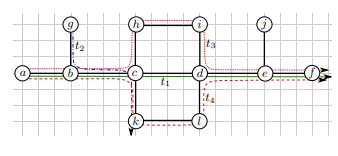

Given a road network like this, the concept of trajectory splitting is the following:

Each trajectory of a vehicle that is present in the dataset, is broken into smaller pieces (sub-trajectories) based on the following condition: "Each sub-trajectory shall contain consecutive position records for a single vehicle, which shall be separated in time by a maximum of two 'n_sec' time units. The 'n_sec' is defined by the user."

In [ ]:
# Insert a new column
all_data.insert(1,'traj_id',-1)

In [ ]:
'''
Each taxi_id contains GPS data of one trajectory

If the time gap between two GPS points is lower than 'n_sec' seconds, (condition 1)
and these GPS points belong to the same 'taxi_id'  (condition 2)
then asign the same 'traj_id' number. (result)

If the time gap between two GPS points is higher than 'n_sec' seconds, (condition 1)
and these GPS points belong to the same 'taxi_id'  (condition 2)
then asign different 'traj_id' number to each of these GPS points. (result)

If the GPS points belong to the same 'taxi_id'  (condition)
then asign different 'traj_id' number to each of these GPS points. (result)

'''

# Max number of seconds between GPS records of each traectory
n_sec = 90
traj_id = 0

for i in range(all_data.shape[0] -1):

    # Belong to the same 'taxi_id'
    if (all_data['taxi_id'][i+1] == all_data['taxi_id'][i]):

        # Tme interval less-equal than 'n_sec'
        if (((all_data['Date Time'][i+1])-(all_data['Date Time'][i])).total_seconds() <= n_sec):
            all_data.at[i,'traj_id'] = traj_id
            all_data.at[i+1,'traj_id'] = traj_id

        # Time interval higher than 'n_sec'
        else:
            all_data.at[i,'traj_id'] = traj_id
            traj_id +=1
            all_data.at[i+1,'traj_id'] = traj_id

    # Not belong to the same 'taxi_id'
    else:
        all_data.at[i,'traj_id'] = traj_id
        traj_id  = 0
        all_data.at[i+1,'traj_id'] = traj_id

In [ ]:
# Print splitted data
all_data

,taxi_id,traj_id,Latitude,Longitude,Date Time
0,0,0,37.64679,-122.4066,2008-05-17 22:25:36
1,0,1,37.80765,-122.41232,2008-05-23 04:25:54
2,0,2,37.75306,-122.50573,2008-05-26 05:39:15
3,0,3,37.76727,-122.45859,2008-05-28 07:12:15
4,0,4,37.7387,-122.40644,2008-05-28 20:44:00
...,...,...,...,...,...
11220486,536,531,<cab,"id=""evfler""",NaT
11220487,536,532,<cab,"id=""usbekhia""",NaT
11220488,536,533,<cab,"id=""obacvau""",NaT
11220489,536,534,<cab,"id=""eemafbij""",NaT


In [ ]:
# Save results to a csv file
SAVE_PATH = '/content/drive/MyDrive/Paper/splitted_data.csv'
all_data.to_csv(SAVE_PATH, index=False)

The file that was created, will be used in the next code file.
The next code file has the title of 'Map Matching'